In [ ]:
import glob
import pandas as pd

directories = [
    "Data/Ransomware/*/*.csv",
]

file_count = {}
graph_data = []
index = 1
for directory in directories:
    file_paths = glob.glob(directory)
    file_count[directory] = len(file_paths)

    for file_path in file_paths:
        data = pd.read_csv(file_path)

        source_count = data[" Source IP"].value_counts()
        destination_count = data[" Destination IP"].value_counts()

        total_count = source_count.add(destination_count, fill_value=0)
        central_node = total_count.idxmax()

        filtered_data = data[
            (data[" Source IP"] == central_node)
            | (data[" Destination IP"] == central_node)
        ]

        output_file_path = f"Star_data/Ransomware/Ransomware_{index}.csv"
        filtered_data.to_csv(output_file_path, index=False)
        print(f"Saved {output_file_path}")
        index += 1

4685


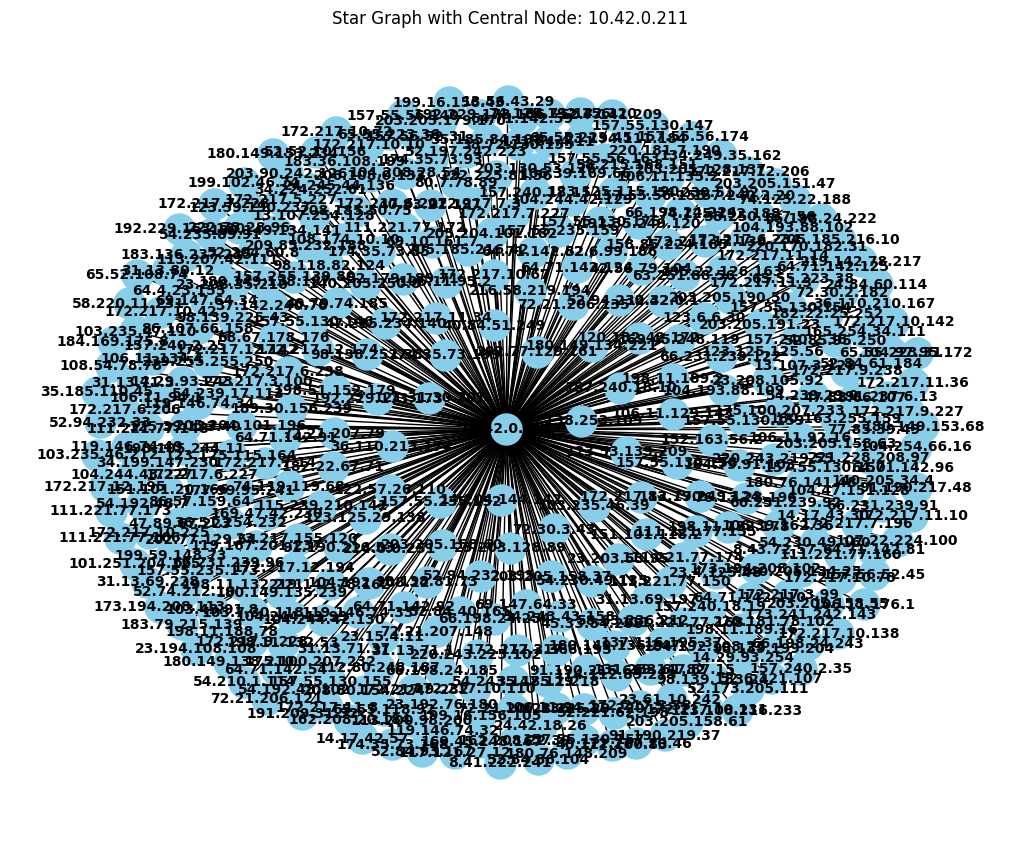

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = "Star_data/Ransomware/Ransomware_1.csv"
data = pd.read_csv(file_path)

source_count = data[" Source IP"].value_counts()
destination_count = data[" Destination IP"].value_counts()

total_count = source_count.add(destination_count, fill_value=0)
central_node = total_count.idxmax()

filtered_data = data[
    (data[" Source IP"] == central_node) | (data[" Destination IP"] == central_node)
]

G = nx.Graph()

print(len(filtered_data))
for _, row in filtered_data.iterrows():
    G.add_edge(row[" Source IP"], row[" Destination IP"])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
)
plt.title(f"Star Graph with Central Node: {central_node}")
plt.show()